In [20]:
from typing import TypedDict,List
import random
from langgraph.graph import StateGraph,START,END

In [21]:
class AgentState (TypedDict):
    message :str
    name :str
    number :List[int]
    counter : int

In [22]:
def greet (state :AgentState) ->AgentState:
    state['message']=f'Hi {state['name']} ! welcome back , so glad to see you '
    state['counter']=0
    return state

def random_plug(state :AgentState) ->AgentState:
    """Generates a random number from 0 to 10"""
    state['number'].append(random.randint(0,10))
    state['counter']+=1
    return state

def loop (state : AgentState)->AgentState:
    if len(state['number'])<5 :
        return "looping"
    else :
        return "exit"

In [23]:
graph =StateGraph(AgentState)
graph.add_node('greet',greet)
graph.add_node('random',random_plug)
graph.add_conditional_edges(
    'random',
    loop,
    {
       "looping":"random" ,
       "exit":END
    }
)

graph.add_edge(START,'greet')
graph.add_edge('greet','random')
model=graph.compile()

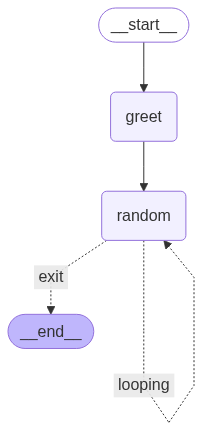

In [24]:
from IPython.display import Image,display
display(Image(model.get_graph().draw_mermaid_png()))

In [25]:
rslt=model.invoke({"name":"Vaibhav", "number":[], "counter":-100})
print(rslt)

{'message': 'Hi Vaibhav ! welcome back , so glad to see you ', 'name': 'Vaibhav', 'number': [5, 1, 9, 10, 9], 'counter': 5}
